## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [ ]:
import pandas as pd


## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [ ]:
#data = pd.read_csv('')
#data.head()

# 1. About the Data


The dataset is gotten from Kaggle(kaggle.com) It Contains details of cars and their various features. It contains 205 rows and 26 columns.
We have many attributes we would use some or all of 25 columns as our predictors and 1 as the target.
There are 16 numerical columns while others are non-numerical

# 2. Objectives


The object of this analysis is to choose the model that gives the good predicting capability and get to know which features has good correlation with the target

After i have decided to use the Car data, i checked for the first 5 rows using .head() method to see how my data are arranged, i looked through the data attributes by using the .info() to see their data types, also check the number of rows and number of null rows for missing data, i saw that all my attributes do not have missing data so there is no need to drop or use SimpleImputer() to fill missing values.
i also used .dtypes.value_counts() method to check the datatypes category and their numbers, used .describe() to check a brief statistics about the data am working on.
Since the Car_ID is more like an index i converted it to my index because i might just drop it, it wouldn't have any effect on the data.
I did some correlation on my data to check which columns might have a good correlation coefficient with my target (price) NB: correlation only works with numberical data, so it only selected 15 attributes, with that i was able to drop some irrelevant columns using .drop().
After dropping, we have to do some conversion, machine learning only works with numbers, so we had to convert some categorical data to numbers using get_dummies() which automatically increase my number of columns to 27.
I did some few visualizations with some of my significant variables with the target, with the visualizations, we can notice that the correlation is strong.
Lastly in the data preprocessing step I divided by data into predictors (X) and target variable (y) then i split the data into train and test data using train_test_split() with the test_size of 20% and random_state of 42.

Building the model
I trained three regression models with different approaches
Firstly, i trained the linear regression model with default parameters, did prediction and i had a r2 score of 87.06%(0.8706) which is fair and ok with optimism that other models would do better and also accompany it with a visualization of the actual and predicted result. Training a linear regression with polynomial features gave the worst r2 score of negative
Secondly, i trained a Lasso Regression model, i did lasso regression without scaling and had a r2 score of 87.13% then when i scaled it, i had a better r2 score of 87.18% but with some hyperparameter alpha tweaking, a good alpha would give me better r2 but a bad alpha might be worst than a linear regression model.
Thirdly, i trained a Ridge regression, without scaling i had a r2 score of 88.61 and by scaling, i had a better r2 score of 88.69.
I had to do some hyperparameter tweaking with alpha and max_iter so that they would be convergence.

Lastly i add a polynomial to the three models in pipeline.
Linear Regression with polynomial gave me a bad result with negative r2 score,
Ridge regression, i had a  score of 82.87% while
Lasso regression, i had a score of 89.76% which is the best among them. I believe it was able to zero more irrelevant attributes to get this better score.

In summary i would choose the lasso regression with polynomial because i felt it was able to zero out some irrelevant features out giving more rooms to the relevant ones to make more impact in the prediction. It's accuracy is fair and better among others.

Scaling the model with polynomial features would deliver a bad score, so the model with the polynomial function in pipeline would be a better fit.
To achieve a better score but might increase complexity is using carname,
we all know that carname is another good way for determining car price but remember car name is object converting it to dummies would increase the number of features way too much

# 3. Linear Regression Models


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
cars=pd.read_csv("CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars.dtypes.value_counts()

object     10
int64       8
float64     8
dtype: int64

In [ ]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
cars.set_index('car_ID', inplace=True)

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

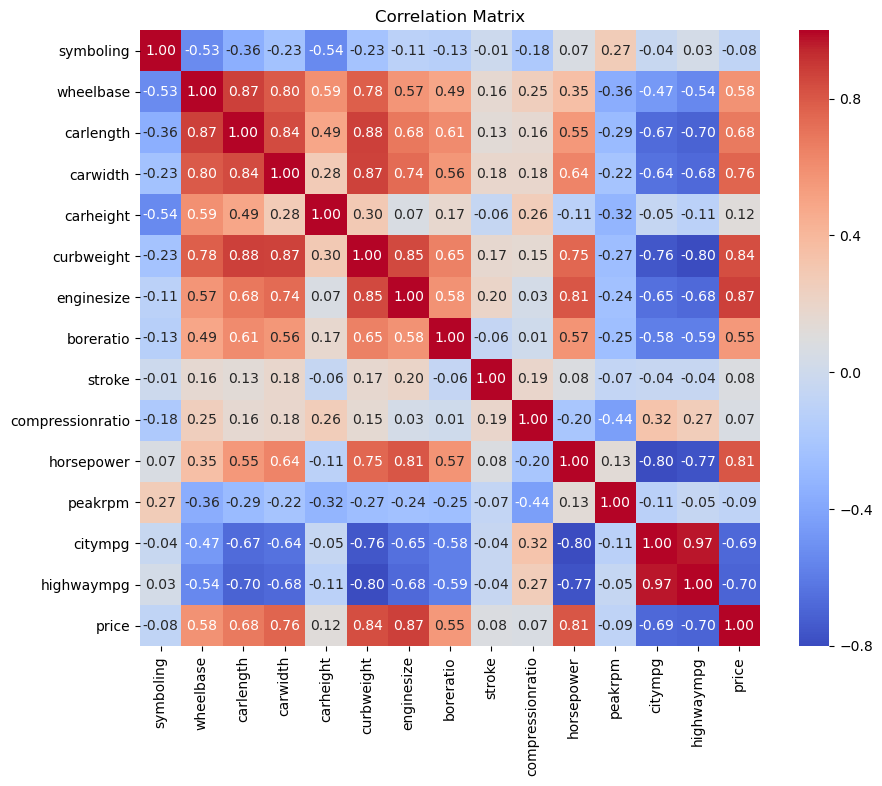

In [ ]:
corr_mat = cars.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#column pearkm, compressionration,stroke, carheight, symboling aren't having strong coefficent with the target p

In [ ]:
#dropping insignificant variables
cars.drop(['peakrpm','compressionratio','stroke','carheight', 'symboling' ] , axis=1, inplace=True)

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CarName         205 non-null    object 
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   doornumber      205 non-null    object 
 4   carbody         205 non-null    object 
 5   drivewheel      205 non-null    object 
 6   enginelocation  205 non-null    object 
 7   wheelbase       205 non-null    float64
 8   carlength       205 non-null    float64
 9   carwidth        205 non-null    float64
 10  curbweight      205 non-null    int64  
 11  enginetype      205 non-null    object 
 12  cylindernumber  205 non-null    object 
 13  enginesize      205 non-null    int64  
 14  fuelsystem      205 non-null    object 
 15  boreratio       205 non-null    float64
 16  horsepower      205 non-null    int64  
 17  citympg         205 non-null    int

In [ ]:
significant_variables = ['enginetype', 'fueltype', 'carbody', 'aspiration', 'cylindernumber',
                           'drivewheel', 'curbweight', 'carlength', 'carwidth', 'enginesize',
                           'boreratio', 'horsepower', 'wheelbase', 'price']

# Create a new dataframe with only the significant variables
sign_feat = cars[significant_variables].copy()

# Display the new dataframe
sign_feat.head()

,enginetype,fueltype,carbody,aspiration,cylindernumber,drivewheel,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,price
car_ID,,,,,,,,,,,,,,
1,dohc,gas,convertible,std,four,rwd,2548,168.8,64.1,130,3.47,111,88.6,13495.0
2,dohc,gas,convertible,std,four,rwd,2548,168.8,64.1,130,3.47,111,88.6,16500.0
3,ohcv,gas,hatchback,std,six,rwd,2823,171.2,65.5,152,2.68,154,94.5,16500.0
4,ohc,gas,sedan,std,four,fwd,2337,176.6,66.2,109,3.19,102,99.8,13950.0
5,ohc,gas,sedan,std,five,4wd,2824,176.6,66.4,136,3.19,115,99.4,17450.0


In [ ]:
#converting categorical to number using dummy variables
dummy_columns = ['enginetype', 'fueltype', 'carbody', 'aspiration', 'cylindernumber', 'drivewheel']
sign_feat= pd.get_dummies(sign_feat, columns=dummy_columns, drop_first=True)

# Display the new dataframe with dummy variables
sign_feat.head()

,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,price,enginetype_dohcv,enginetype_l,...,carbody_wagon,aspiration_turbo,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
car_ID,,,,,,,,,,,,,,,,,,,,,
1,2548,168.8,64.1,130,3.47,111,88.6,13495.0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2548,168.8,64.1,130,3.47,111,88.6,16500.0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2823,171.2,65.5,152,2.68,154,94.5,16500.0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2337,176.6,66.2,109,3.19,102,99.8,13950.0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,2824,176.6,66.4,136,3.19,115,99.4,17450.0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
sign_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   curbweight             205 non-null    int64  
 1   carlength              205 non-null    float64
 2   carwidth               205 non-null    float64
 3   enginesize             205 non-null    int64  
 4   boreratio              205 non-null    float64
 5   horsepower             205 non-null    int64  
 6   wheelbase              205 non-null    float64
 7   price                  205 non-null    float64
 8   enginetype_dohcv       205 non-null    uint8  
 9   enginetype_l           205 non-null    uint8  
 10  enginetype_ohc         205 non-null    uint8  
 11  enginetype_ohcf        205 non-null    uint8  
 12  enginetype_ohcv        205 non-null    uint8  
 13  enginetype_rotor       205 non-null    uint8  
 14  fueltype_gas           205 non-null    uint8  
 15  carbod

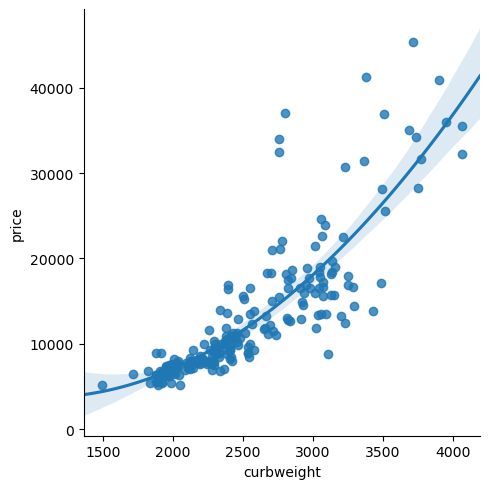

In [ ]:
sns.lmplot(x = 'curbweight', y = 'price', data = sign_feat, order=2) #visualization with some strong features

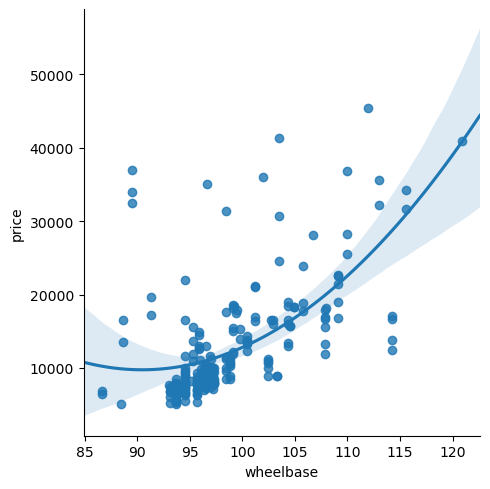

In [ ]:
sns.lmplot(x = 'wheelbase', y = 'price', data = sign_feat, order=2)

In [ ]:
#splitting data into predictors and target
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features (X) and Target variable (y)
X = sign_feat.drop('price', axis=1)
y = sign_feat['price']


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) #spliting data into train and test

In [ ]:
X_train[:5]

,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,enginetype_dohcv,enginetype_l,enginetype_ohc,...,carbody_wagon,aspiration_turbo,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
car_ID,,,,,,,,,,,,,,,,,,,,,
67,2700,175.0,66.1,134,3.43,72,104.9,0,0,1,...,0,0,0,1,0,0,0,0,0,1
112,3075,186.7,68.4,120,3.46,95,107.9,0,1,0,...,0,0,0,1,0,0,0,0,0,1
154,2280,169.7,63.6,92,3.05,62,95.7,0,0,1,...,1,0,0,1,0,0,0,0,1,0
97,1971,165.3,63.8,97,3.15,69,94.5,0,0,1,...,0,0,0,1,0,0,0,0,1,0
39,2289,167.5,65.2,110,3.15,86,96.5,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
#building model with linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (MSE)= {rmse}')
print(f'R-squared (R2)= {r2}')

Root Mean Squared Error (MSE)= 3195.2965672090254
R-squared (R2)= 0.8706688608123749


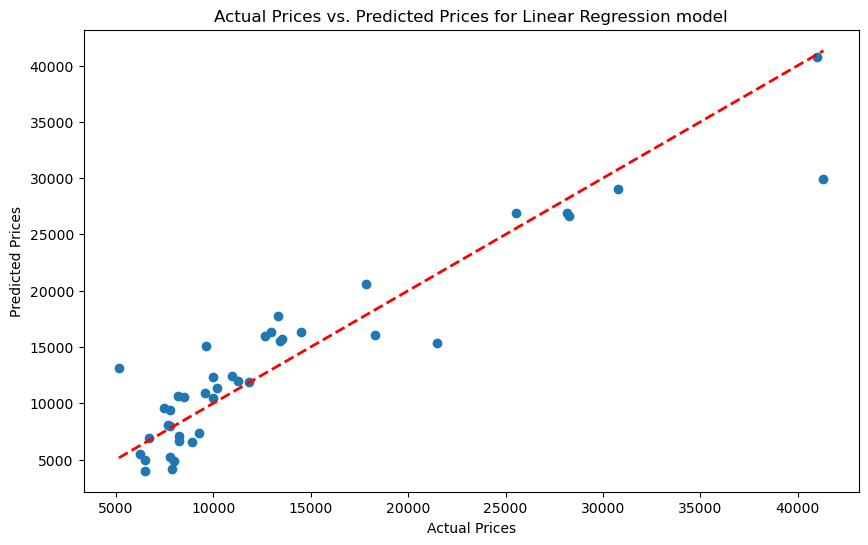

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for reference
plt.title('Actual Prices vs. Predicted Prices for Linear Regression model')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


In [ ]:
#building model with lasso model without scaling
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Create a Lasso regression model
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength

# Train the model on the scaled training data
lasso.fit(X_train, y_train)

# Make predictions
y_predl = lasso.predict(X_test)

rmsel = np.sqrt(mean_squared_error(y_test, y_predl))
r2l = r2_score(y_test, y_predl)

print(f'Root Mean Squared Error (MSE)= {rmsel}')
print(f'R-squared (R2)= {r2l}')

Root Mean Squared Error (MSE)= 3186.6741437820565
R-squared (R2)= 0.8713659123832921


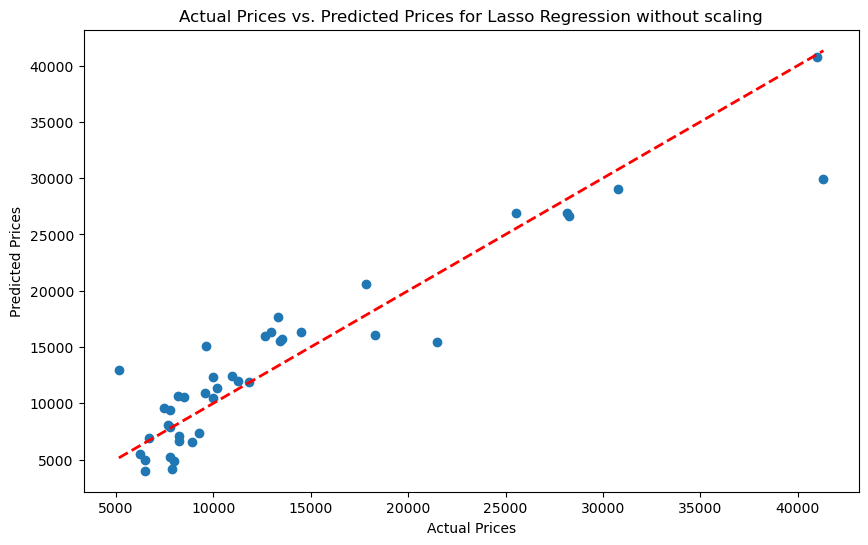

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predl)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for reference
plt.title('Actual Prices vs. Predicted Prices for Lasso Regression without scaling')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the scaled features
X_train_scaled[:5]  # Displaying the first 5 rows for reference

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


array([[ 0.28128677,  0.07244984,  0.08381686,  0.18801047,  0.4058361 ,
        -0.81538553,  1.03708546, -0.07832604, -0.26813322,  0.64326752,
        -0.26813322, -0.2548236 , -0.13650473, -3.15171911, -0.17733173,
        -0.7200823 ,  1.05003052, -0.36198685, -0.46348119, -0.19487094,
         0.51140831, -0.372678  ,  0.        , -0.07832604, -0.13650473,
        -1.17337615,  1.26616531],
       [ 1.01604452,  1.04391556,  1.17026768, -0.15899277,  0.51738434,
        -0.24189416,  1.54123134, -0.07832604,  3.72948936, -1.55456318,
        -0.26813322, -0.2548236 , -0.13650473,  0.31728716, -0.17733173,
        -0.7200823 ,  1.05003052, -0.36198685, -0.46348119, -0.19487094,
         0.51140831, -0.372678  ,  0.        , -0.07832604, -0.13650473,
        -1.17337615,  1.26616531],
       [-0.54164191, -0.36761583, -1.09710795, -0.85299925, -1.00710835,
        -1.0647296 , -0.50896191, -0.07832604, -0.26813322,  0.64326752,
        -0.26813322, -0.2548236 , -0.13650473,  0.3172

In [ ]:
# Create a Lasso regression model (scaled)
lasso_s = Lasso(alpha=10, max_iter=10000)  # alpha is the regularization strength

# Train the model on the scaled training data
lasso_s.fit(X_train_scaled, y_train)

# Make predictions
y_predls = lasso_s.predict(X_test_scaled)

rmsels = np.sqrt(mean_squared_error(y_test, y_predls))
r2ls = r2_score(y_test, y_predls)

print(f'Root Mean Squared Error (MSE)= {rmsels}')
print(f'R-squared (R2)= {r2ls}')

Root Mean Squared Error (MSE)= 3055.087363294635
R-squared (R2)= 0.8817699086851599


In [ ]:

# Create a Ridge regression model
r = Ridge(alpha=0.1)  # alpha is the regularization strength

# Train the model on the scaled training data
r.fit(X_train, y_train)

# Make predictions
y_predr = r.predict(X_test)

rmser = np.sqrt(mean_squared_error(y_test, y_predr))
r2r = r2_score(y_test, y_predr)

print(f'Root Mean Squared Error (MSE)= {rmser}')
print(f'R-squared (R2)= {r2r}')


Root Mean Squared Error (MSE)= 2997.9639081977643
R-squared (R2)= 0.8861498629698961


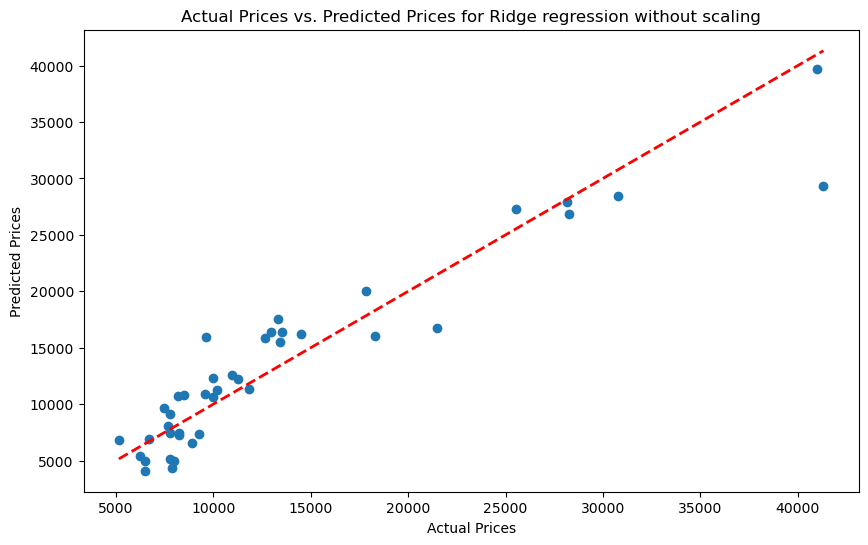

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for reference
plt.title('Actual Prices vs. Predicted Prices for Ridge regression without scaling')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


In [ ]:
# Create a Ridge regression model (scaled)
r_s = Ridge(alpha=1, max_iter=10000)  # alpha is the regularization strength

# Train the model on the scaled training data
r_s.fit(X_train_scaled, y_train)

# Make predictions
ridpred = r_s.predict(X_test_scaled)

rmsrs = np.sqrt(mean_squared_error(y_test, ridpred))
r2ridges = r2_score(y_test, ridpred)

print(f'Root Mean Squared Error (MSE)= {rmsrs}')
print(f'R-squared (R2)= {r2ridges}')

Root Mean Squared Error (MSE)= 2986.814316896079
R-squared (R2)= 0.8869951180062812


In [ ]:
#Constructing a pipeline with polynomial features for linear regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('linear', LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:209: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


Pipeline(memory=None,
     steps=[('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [ ]:
print("R^2 on training  data:", pipe.score(X_train, y_train))
print("R^2 on testing data:", pipe.score(X_test,y_test))

R^2 on training  data: 0.9980547318719201
R^2 on testing data: -163.48547281772062


In [ ]:
#Constructing a pipeline with polynomial features for Ridge regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('ridge', Ridge(alpha=100,max_iter=10000))]
pipe=Pipeline(Input)
pipe.fit(X_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:209: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


Pipeline(memory=None,
     steps=[('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('ridge', Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [ ]:
print("R^2 on testing data:", pipe.score(X_test,y_test))

R^2 on testing data: 0.8282738159346802


In [ ]:
#Constructing a pipeline with polynomial features for Lasso regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('lasso', Lasso(alpha=100,max_iter=10000))]
pipe=Pipeline(Input)
pipe.fit(X_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:209: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Pipeline(memory=None,
     steps=[('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('lasso', Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [ ]:
print("R^2 on testing data:", pipe.score(X_test,y_test))

R^2 on testing data: 0.8975146794458497


# 4. Insights and key findings


In summary i would choose the lasso regression with polynomial because i felt it was able to zero out some irrelevant features out giving more rooms to the relevant ones to make more impact in the prediction. It's accuracy is fair and better among others.

# 5. Next Steps


Scaling the model with polynomial features would deliver a bad score, so the model with the polynomial function in pipeline would be a better fit. To achieve a better score but might increase complexity is using carname, we all know that carname is another good way for determining car price but remember car name is object converting it to dummies would increase the number of features way too much

I had to play with some other regression to see how well they predict the data Decision Trees and Random Forest Regressors performed well so it's just an out of the box curiosity

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Make predictions
dt_pred = dt.predict(X_test)
dtrm = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_r = r2_score(y_test, dt_pred)

print(f'Root Mean Squared Error (MSE)= {dtrm}')
print(f'R-squared (R2)= {dt_r}')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

# Make predictions
rfp = rfr.predict(X_test)
rfrm = np.sqrt(mean_squared_error(y_test, rfp))
rfr2 = r2_score(y_test, rfp)

print(f'Root Mean Squared Error (MSE)= {rfrm}')
print(f'R-squared (R2)= {rfr2}')

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
